In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv('wine.data',
                      header=None)

In [4]:
df.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

In [5]:
df.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
df.shape

(178, 14)

In [7]:
from sklearn.model_selection import train_test_split

X, y = df.iloc[:, 1:], df.iloc[:, 0]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=5,stratify=y)

In [8]:
X

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [9]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Class label, Length: 178, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class label                   178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [11]:
from sklearn.decomposition import PCA

In [13]:

from sklearn.preprocessing import StandardScaler

# Step 1
scaler=StandardScaler()

X_train_std=scaler.fit_transform(X_train)
X_test_std=scaler.transform(X_test)

In [14]:
X_train_std.shape,X_train_std.T.shape

((124, 13), (13, 124))

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca=PCA()

X_train_pca=pca.fit_transform(X_train_std)

In [18]:
X_train_pca

array([[-3.49294369, -2.9876619 , -0.21047376, ..., -0.69876653,
        -0.2858455 , -0.41731666],
       [ 0.40376737,  1.9312161 ,  1.30070182, ..., -0.2279537 ,
        -0.77726135,  0.42132474],
       [ 1.43977351,  1.85415476,  0.72541142, ...,  0.14133173,
         0.35899913,  0.02870476],
       ...,
       [-2.06921257, -1.37124465,  0.13226052, ...,  0.12390939,
        -0.01158716,  0.0678424 ],
       [ 1.66723894,  1.70111765,  1.03425416, ..., -0.3764578 ,
         0.24812389,  0.37480832],
       [-1.72737672,  0.17956884,  0.76786007, ...,  0.01499327,
         0.17878966, -0.23348593]])

In [19]:
pca.explained_variance_ratio_

array([0.3531598 , 0.18991431, 0.1212606 , 0.07082859, 0.06419507,
       0.05433092, 0.042823  , 0.02783653, 0.02127565, 0.02016314,
       0.01536181, 0.01144181, 0.00740877])

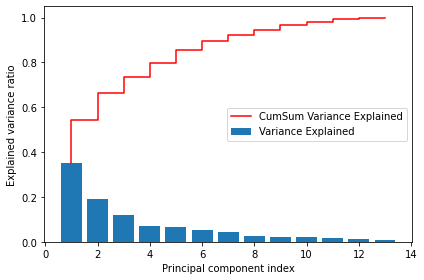

In [20]:
plt.bar(range(1,14),pca.explained_variance_ratio_,label='Variance Explained')
plt.step(range(1,14),np.cumsum(pca.explained_variance_ratio_),label='CumSum Variance Explained',c='r')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [25]:
for cls?

In [ ]:
for cls  

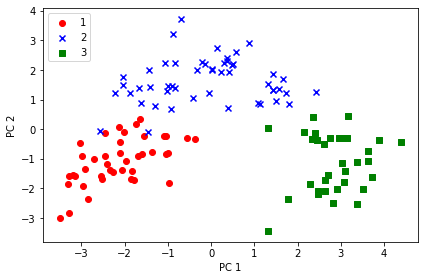

In [24]:
colors=['r','b','g','y']
markers=['o','x','s']




for cls,c,m in zip(np.unique(y_train),colors,markers):
    plt.scatter(X_train_pca[y_train == cls, 0], 
                X_train_pca[y_train == cls, 1], 
                c=c, label=cls, marker=m)
    
    
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/05_03.png', dpi=300)
plt.show()

array([[-3.49294369, -2.9876619 ],
       [ 0.40376737,  1.9312161 ],
       [ 1.43977351,  1.85415476],
       [ 1.81240205,  0.83335041],
       [-3.29594074, -2.81204962],
       [-2.57196057, -0.05830805],
       [-1.77213879, -1.72467047],
       [ 2.7526127 , -0.31084562],
       [-0.87241623,  3.22468951],
       [-1.43562109,  2.00880318],
       [ 2.81813015, -2.4824276 ],
       [ 1.78500521, -2.34918848],
       [ 0.36705777,  2.38754633],
       [ 2.2778662 , -1.85854179],
       [-3.15674854, -1.5914951 ],
       [-2.21479757,  1.22129467],
       [ 0.56546031,  2.60645201],
       [-1.28669893,  0.77328512],
       [ 0.02178449,  2.04196439],
       [ 2.43869603, -0.36078698],
       [ 1.08335461,  0.87427625],
       [-0.13626613,  2.20736512],
       [-2.01339293, -0.08488829],
       [ 0.29604075,  2.24530136],
       [ 3.36361118, -2.53339558],
       [ 0.35715301,  2.29849042],
       [-2.4578961 , -0.91202112],
       [-1.88358914,  1.21174631],
       [ 1.13513847,